# EPFL Machine Learning, Project 1, CERN Dataset

In [67]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from proj1_helpers import load_csv_data

In [2]:
train_set = load_csv_data('../train.csv')

In [118]:
y_train, X_train, ids, columns = train_set

print("X_train shape: {}".format(X_train.shape))
print("\ny_train shape: {}".format(y_train.shape))
print("\nColumn names: {}".format(columns))
print("\nColumn shape: {}".format(columns.shape))

n_features = len(columns)

X_train shape: (250000, 30)

y_train shape: (250000,)

Column names: ['DER_mass_MMC' 'DER_mass_transverse_met_lep' 'DER_mass_vis' 'DER_pt_h'
 'DER_deltaeta_jet_jet' 'DER_mass_jet_jet' 'DER_prodeta_jet_jet'
 'DER_deltar_tau_lep' 'DER_pt_tot' 'DER_sum_pt' 'DER_pt_ratio_lep_tau'
 'DER_met_phi_centrality' 'DER_lep_eta_centrality' 'PRI_tau_pt'
 'PRI_tau_eta' 'PRI_tau_phi' 'PRI_lep_pt' 'PRI_lep_eta' 'PRI_lep_phi'
 'PRI_met' 'PRI_met_phi' 'PRI_met_sumet' 'PRI_jet_num'
 'PRI_jet_leading_pt' 'PRI_jet_leading_eta' 'PRI_jet_leading_phi'
 'PRI_jet_subleading_pt' 'PRI_jet_subleading_eta' 'PRI_jet_subleading_phi'
 'PRI_jet_all_pt']

Column shape: (30,)


## Feature Engineering

Showing the features in histograms.

First of all, let's find how many meaningless value that each feature has.

In [17]:
for i in range(n_features):
    print("{}: {}".format(columns[i], len(np.array([x for x in X_train[:,i] if x == -999]))))

DER_mass_MMC: 38114
DER_mass_transverse_met_lep: 0
DER_mass_vis: 0
DER_pt_h: 0
DER_deltaeta_jet_jet: 177457
DER_mass_jet_jet: 177457
DER_prodeta_jet_jet: 177457
DER_deltar_tau_lep: 0
DER_pt_tot: 0
DER_sum_pt: 0
DER_pt_ratio_lep_tau: 0
DER_met_phi_centrality: 0
DER_lep_eta_centrality: 177457
PRI_tau_pt: 0
PRI_tau_eta: 0
PRI_tau_phi: 0
PRI_lep_pt: 0
PRI_lep_eta: 0
PRI_lep_phi: 0
PRI_met: 0
PRI_met_phi: 0
PRI_met_sumet: 0
PRI_jet_num: 0
PRI_jet_leading_pt: 99913
PRI_jet_leading_eta: 99913
PRI_jet_leading_phi: 99913
PRI_jet_subleading_pt: 177457
PRI_jet_subleading_eta: 177457
PRI_jet_subleading_phi: 177457
PRI_jet_all_pt: 0


We are checking if the features that have same number of meaningless values have them in the same element in the dataset

In [136]:
print("For 177457\n")
print("DER_deltaeta_jet_jet = DER_mass_jet_jet: {}".format(
    np.array_equal(np.where(X_train[:,4] == -999)[0], np.where(X_train[:,5] == -999)[0])))
print("DER_deltaeta_jet_jet = DER_prodeta_jet_jet: {}".format(
    np.array_equal(np.where(X_train[:,4] == -999)[0], np.where(X_train[:,6] == -999)[0])))
print("DER_deltaeta_jet_jet = DER_lep_eta_centrality: {}".format(
    np.array_equal(np.where(X_train[:,4] == -999)[0], np.where(X_train[:,12] == -999)[0])))
print("DER_deltaeta_jet_jet = PRI_jet_subleading_pt: {}".format(
    np.array_equal(np.where(X_train[:,4] == -999)[0], np.where(X_train[:,26] == -999)[0])))
print("DER_deltaeta_jet_jet = PRI_jet_subleading_eta: {}".format(
    np.array_equal(np.where(X_train[:,4] == -999)[0], np.where(X_train[:,27] == -999)[0])))
print("DER_deltaeta_jet_jet = PRI_jet_subleading_phi: {}".format(
    np.array_equal(np.where(X_train[:,4] == -999)[0], np.where(X_train[:,28] == -999)[0])))
print("\nFor 99913\n")
print("PRI_jet_leading_pt = PRI_jet_leading_eta: {}".format(
    np.array_equal(np.where(X_train[:,23] == -999)[0], np.where(X_train[:,24] == -999)[0])))
print("PRI_jet_leading_pt = PRI_jet_leading_phi: {}".format(
    np.array_equal(np.where(X_train[:,23] == -999)[0], np.where(X_train[:,25] == -999)[0])))

For 177457

DER_deltaeta_jet_jet = DER_mass_jet_jet: True
DER_deltaeta_jet_jet = DER_prodeta_jet_jet: True
DER_deltaeta_jet_jet = DER_lep_eta_centrality: True
DER_deltaeta_jet_jet = PRI_jet_subleading_pt: True
DER_deltaeta_jet_jet = PRI_jet_subleading_eta: True
DER_deltaeta_jet_jet = PRI_jet_subleading_phi: True

For 99913

PRI_jet_leading_pt = PRI_jet_leading_eta: True
PRI_jet_leading_pt = PRI_jet_leading_phi: True


Let's examine the histograms of features without considering the meaningless values.

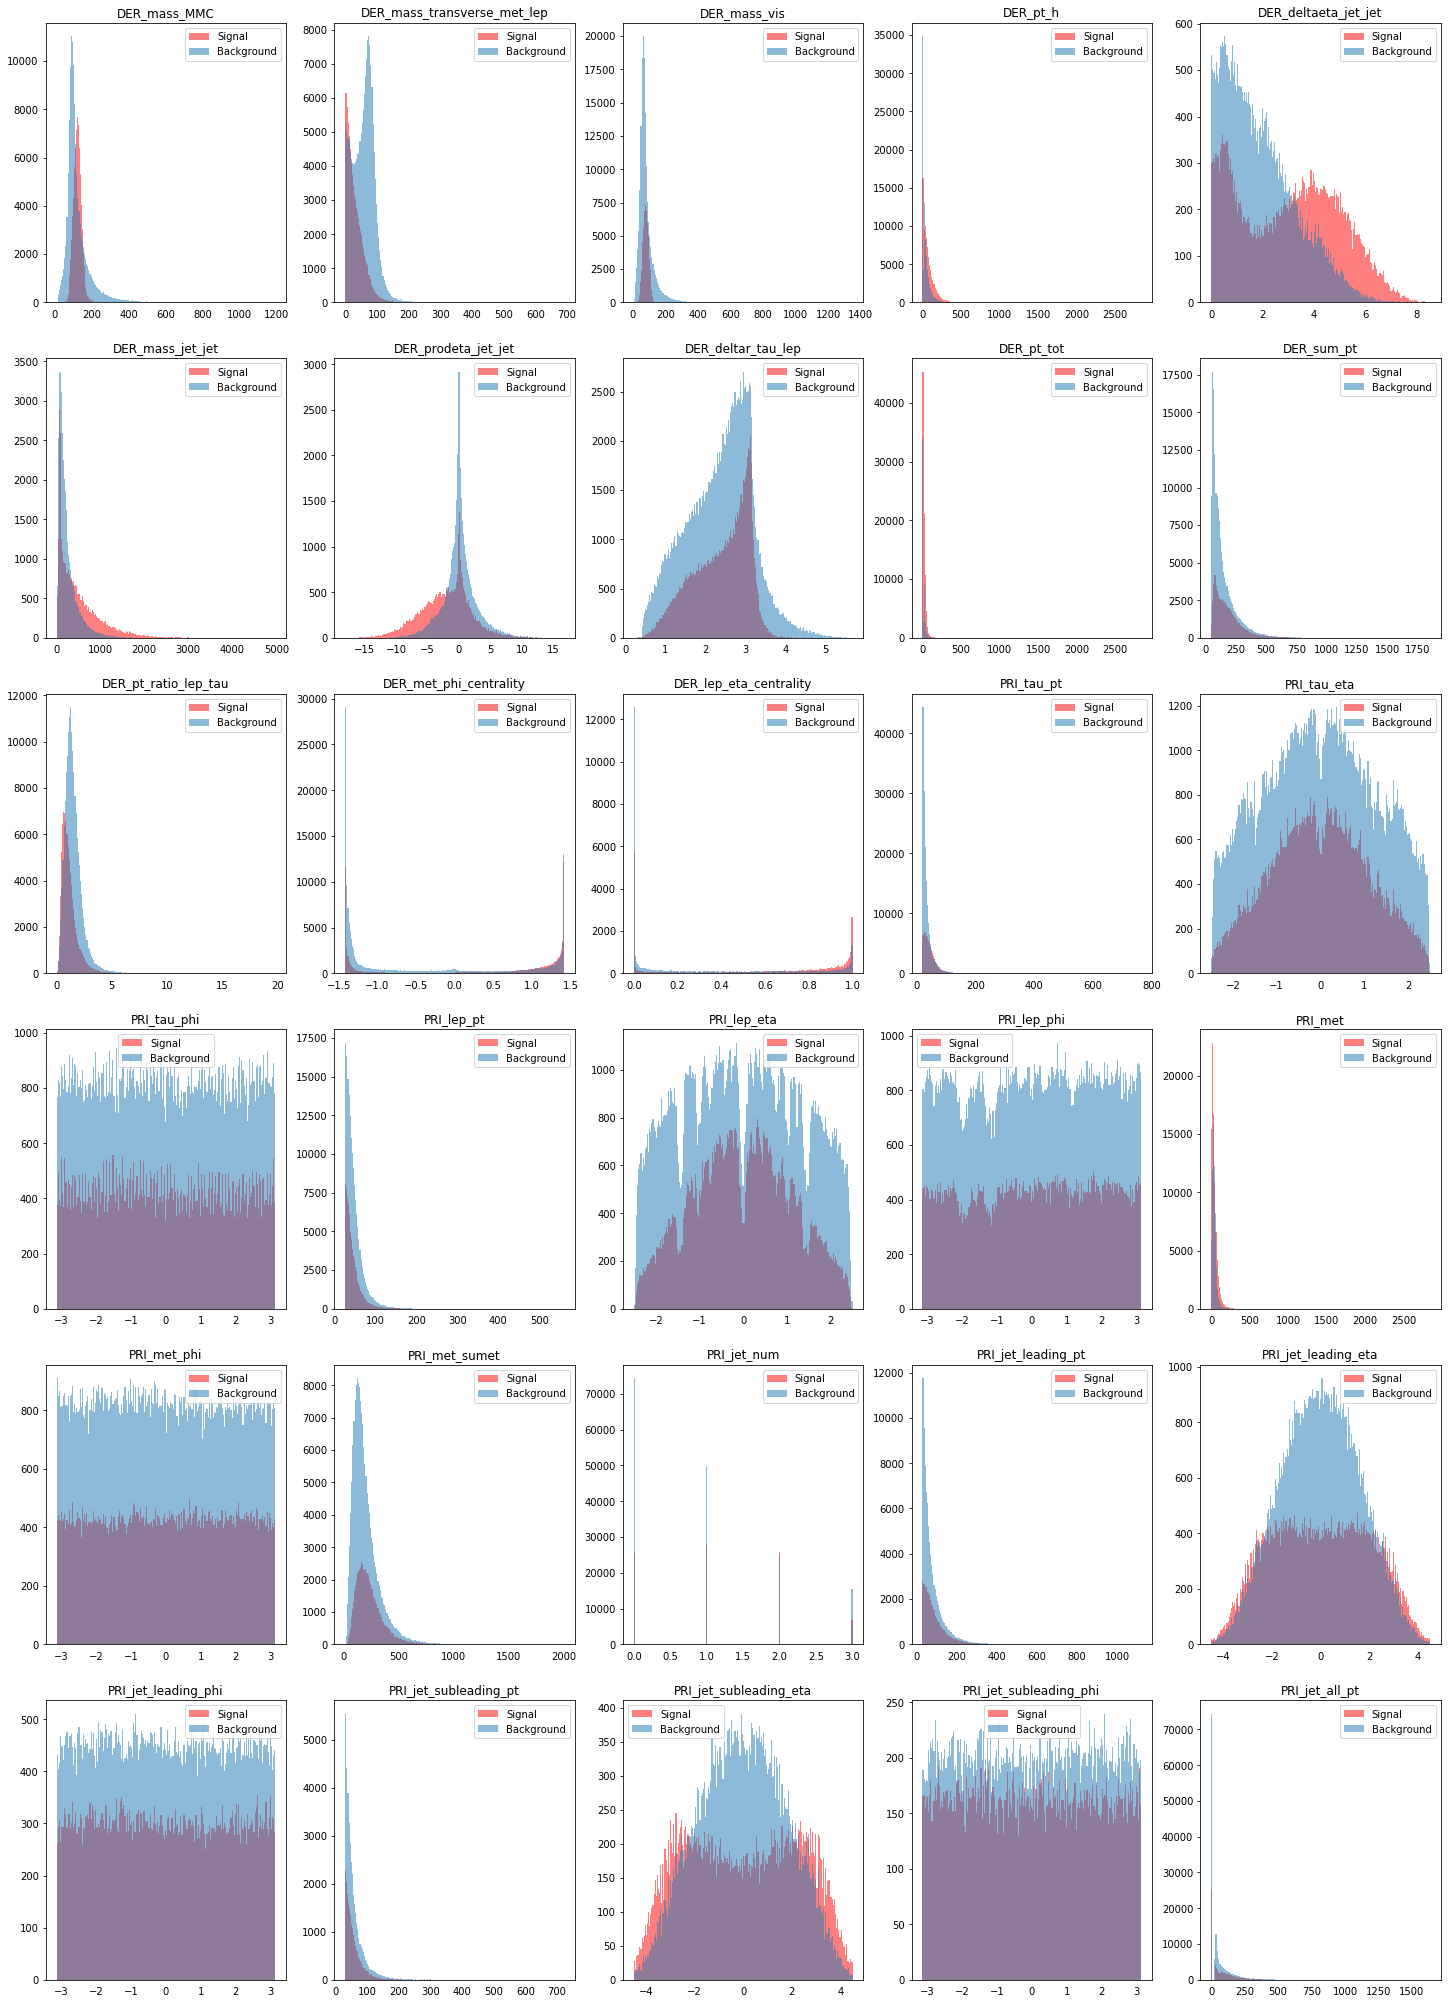

In [151]:
fig, axs = plt.subplots(6, 5, figsize=(25,36))
counter = 0
# We can set the number of bins with the `bins` kwarg
for i in range(6):
    for j in range(5):
        axs[i,j].hist(np.array([x for j,x in enumerate(X_train[:,counter]) if (x != -999 and y_train[j] == 1)]), 
                      bins=200, alpha=0.5, color='red', label='Signal')
        axs[i,j].hist(np.array([x for j,x in enumerate(X_train[:,counter]) if (x != -999 and y_train[j] == 0)]), 
                      bins=200, alpha=0.5, label = 'Background')
        axs[i, j].set_title(columns[counter])
        axs[i,j].legend()
        counter += 1

## Pearson correlation between features

Text(0.5,0,'Correlation Matrix including meaningless values')

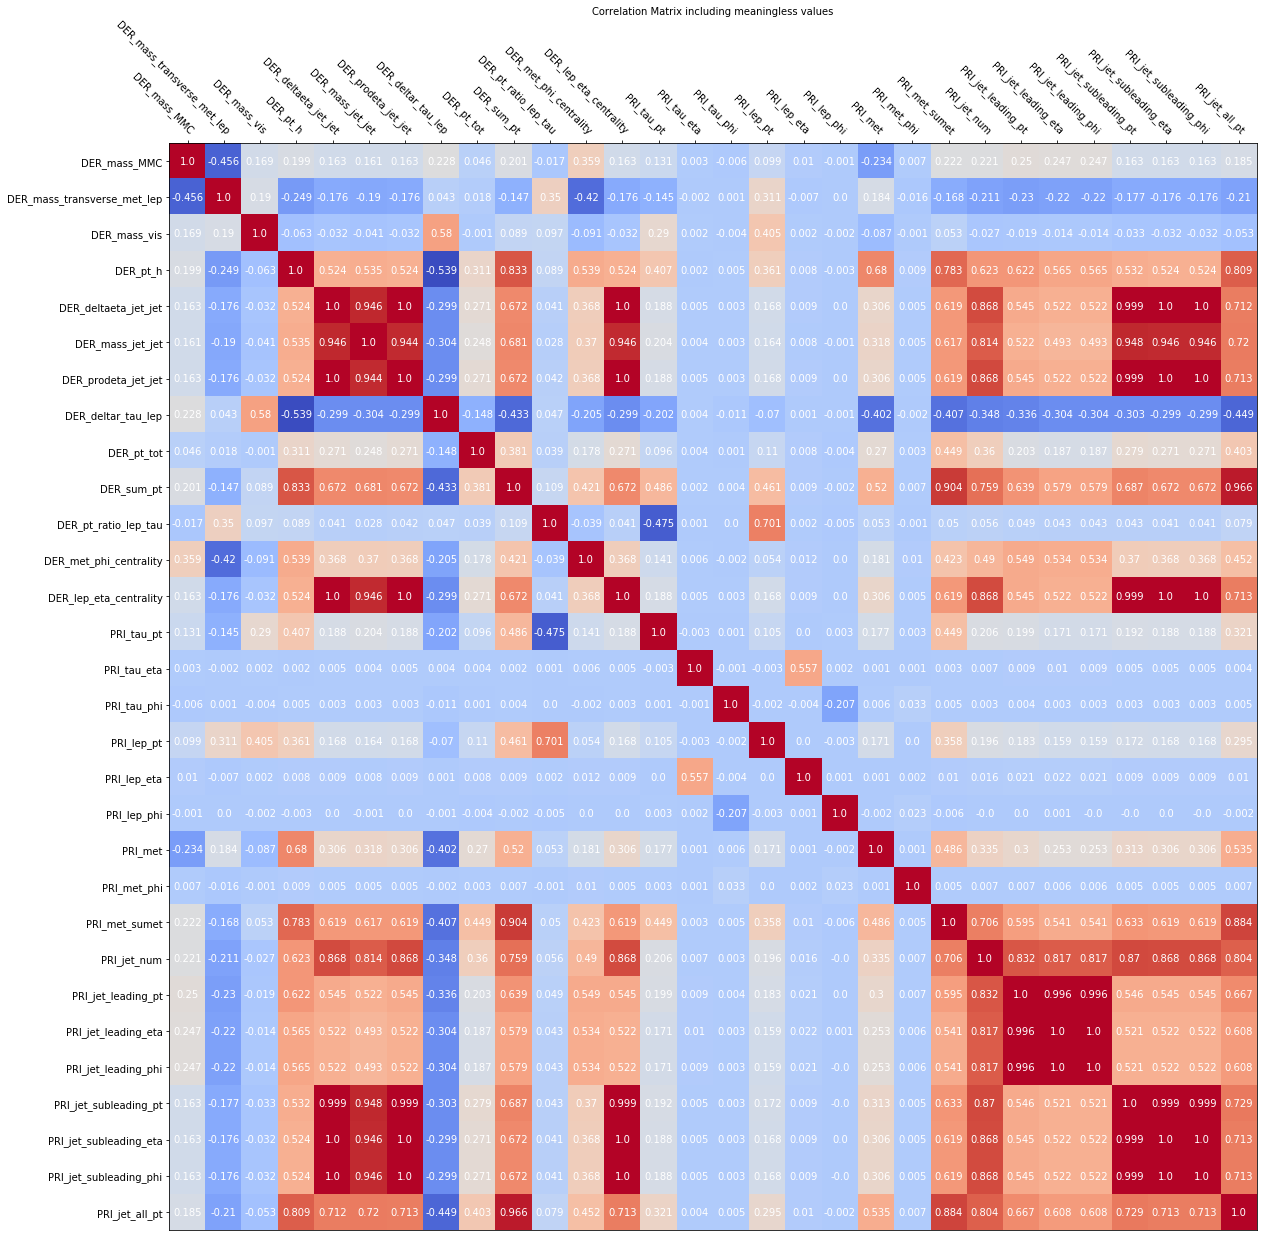

In [101]:
cols = []
for i in range(30):
    cols.append(X_train[:,i])
    
correlations = np.corrcoef(cols)

fig, ax = plt.subplots(figsize=(20,20))
im = ax.imshow(correlations, cmap=cm.coolwarm)

ax.xaxis.set_label_position('top')

# We want to show all ticks...
ax.set_xticks(np.arange(len(columns)))
ax.set_yticks(np.arange(len(columns)))
# ... and label them with the respective list entries
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)

# Let the horizontal axes labeling appear on top.
ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=-45, ha="right",rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(columns)):
    for j in range(len(columns)):
        text = ax.text(j, i, np.around(correlations[i, j],3),
                       ha="center", va="center", color="w")

ax.set_xlabel("Correlation Matrix including meaningless values")

Let's see the correlation matrix of the features that do not have invalid values.

Text(0.5,0,'Correlation Matrix excluding meaningless values')

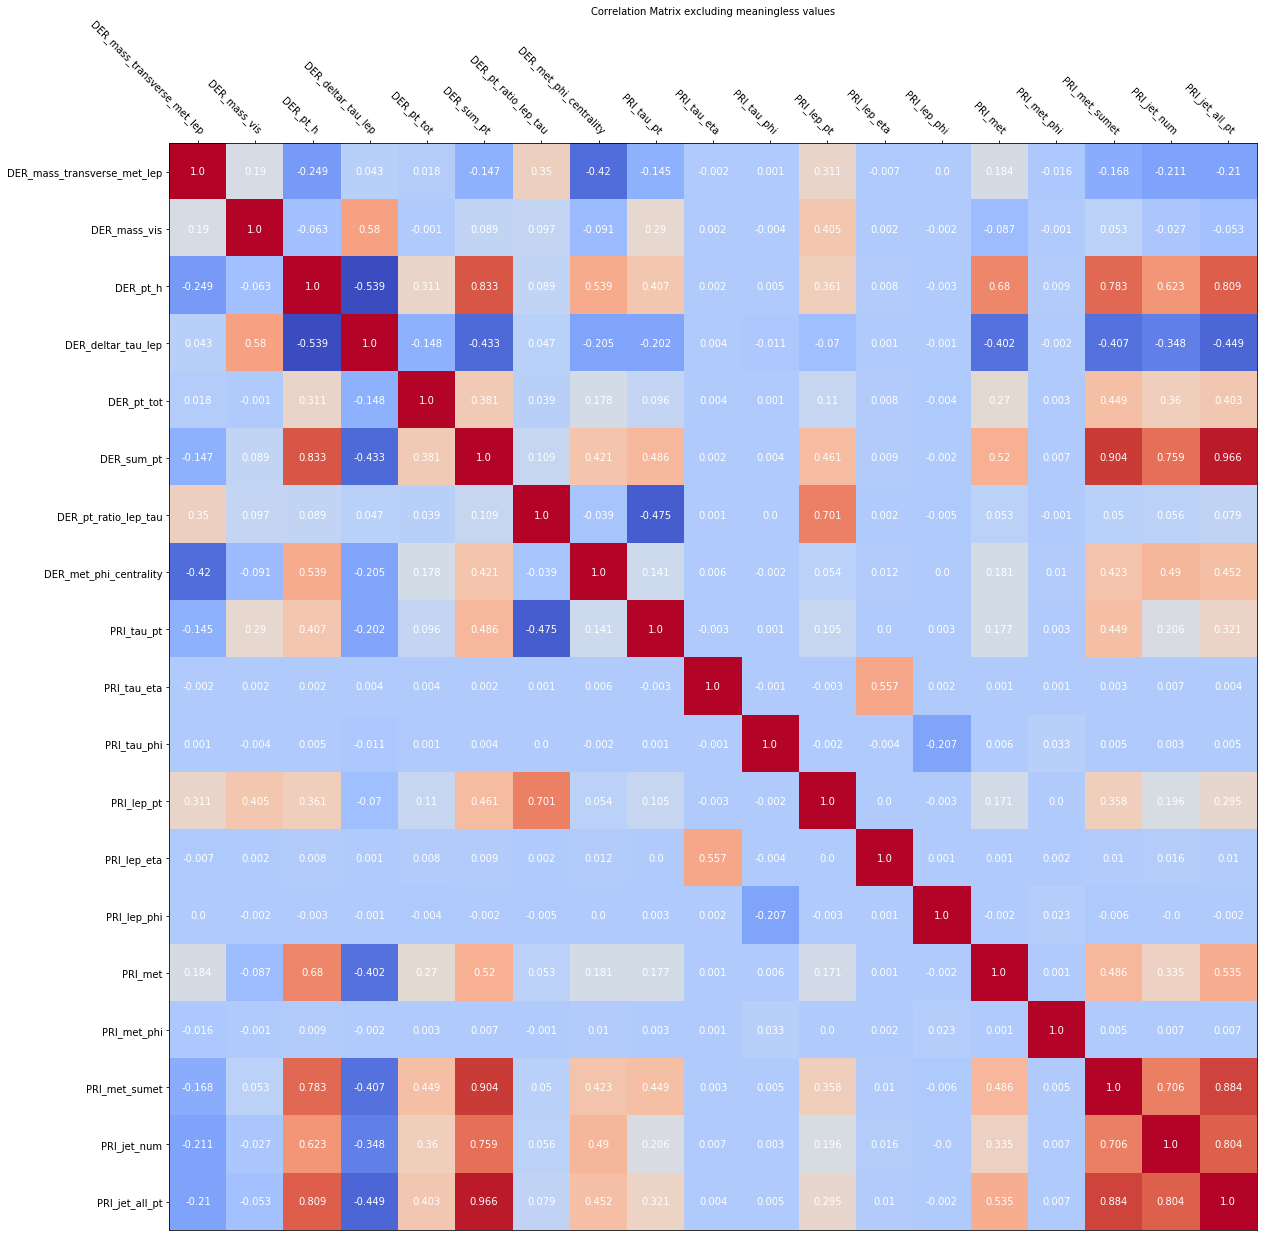

In [162]:
col_num = np.setdiff1d(np.asarray(range(30)), [0,4,5,6,12,23,24,25,26,27,28])
cols = []

for i in col_num:
    cols.append(X_train[:,i])
    
correlations = np.corrcoef(cols)

fig, ax = plt.subplots(figsize=(20,20))
im = ax.imshow(correlations, cmap=cm.coolwarm)

ax.xaxis.set_label_position('top')

# We want to show all ticks...
ax.set_xticks(np.arange(len(col_num)))
ax.set_yticks(np.arange(len(col_num)))
# ... and label them with the respective list entries
ax.set_xticklabels(columns[col_num])
ax.set_yticklabels(columns[col_num])

# Let the horizontal axes labeling appear on top.
ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=-45, ha="right",rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(col_num)):
    for j in range(len(col_num)):
        text = ax.text(j, i, np.around(correlations[i, j],3),
                       ha="center", va="center", color="w")

ax.set_xlabel("Correlation Matrix excluding meaningless values")

Means and variances of the features are below.

In [115]:
for i in range(30):
    print("{}\n\t Mean = {}\n\t Var = {}\n".format(columns[i], 
                                                 np.around(np.mean([x for x in X_train[:,i] if x != -999]),3), 
                                                 np.around(np.var([x for x in X_train[:,i] if x != -999]),3)))

DER_mass_MMC
	 Mean = 121.859
	 Var = 3283.063

DER_mass_transverse_met_lep
	 Mean = 49.24
	 Var = 1249.256

DER_mass_vis
	 Mean = 81.182
	 Var = 1666.975

DER_pt_h
	 Mean = 57.896
	 Var = 4052.03

DER_deltaeta_jet_jet
	 Mean = 2.404
	 Var = 3.035

DER_mass_jet_jet
	 Mean = 371.783
	 Var = 158162.573

DER_prodeta_jet_jet
	 Mean = -0.822
	 Var = 12.847

DER_deltar_tau_lep
	 Mean = 2.373
	 Var = 0.613

DER_pt_tot
	 Mean = 18.917
	 Var = 496.107

DER_sum_pt
	 Mean = 158.432
	 Var = 13387.852

DER_pt_ratio_lep_tau
	 Mean = 1.438
	 Var = 0.714

DER_met_phi_centrality
	 Mean = -0.128
	 Var = 1.425

DER_lep_eta_centrality
	 Mean = 0.458
	 Var = 0.159

PRI_tau_pt
	 Mean = 38.707
	 Var = 502.299

PRI_tau_eta
	 Mean = -0.011
	 Var = 1.474

PRI_tau_phi
	 Mean = -0.008
	 Var = 3.301

PRI_lep_pt
	 Mean = 46.66
	 Var = 486.859

PRI_lep_eta
	 Mean = -0.02
	 Var = 1.6

PRI_lep_phi
	 Mean = 0.044
	 Var = 3.3

PRI_met
	 Mean = 41.717
	 Var = 1082.057

PRI_met_phi
	 Mean = -0.01
	 Var = 3.284

PRI_met_su

Examining how many data is labeled as signal and background.

In [153]:
print("Signal: {}".format(np.sum(y_train > 0)))
print("Background: {}".format(np.sum(y_train == 0)))

Signal: 85667
Background: 164333


Design the naive model. If we predict all of the train set as background, let's see the accuracy of the model.

In [154]:
print("Naive accuracy: {}".format(np.sum(y_train == 0)/len(y_train)))

Naive accuracy: 0.657332
